# Fit to a curve in a logarithmic plane

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from multicurvefit import *

## The data: Lux 2016
http://lux.brown.edu/LUX_dark_matter/Talks_files/LUX_NewDarkMatterSearchResult_332LiveDays_IDM2016_160721.pdf

Consider the following set of points:

<img src="./lux2016.png" width="400"/>

We use g3data (`apt-get install g3data`) to obtain

In [4]:
df=pd.read_csv('lux2016.csv')

In [5]:
df.columns

Index([u'M', u'sigma'], dtype='object')

In [6]:
x=df.columns[0]
y=df.columns[1]
df[y]=1E36*df[y]

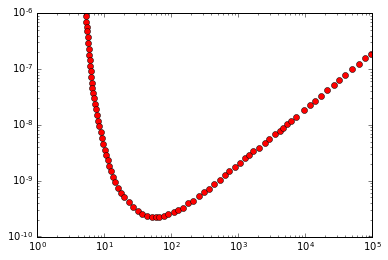

In [7]:
plt.loglog(df[x],df[y],'ro')

## Exponential fit
The user can choose the piecewise of curves to make part of the fit. Each individual curve can be fitted with the
object explained in [index](./index.ipynb)
### Piecewise curves
Will be obtained by trial and error in both the initial and final point and in the order of the polynomial. If one segment is not good enough it will be possible to delete it.
## Object design
The object, e,g: `fit`, will be initialized with the `x` and `y` arrays:
It will have the following methods
* `add_curve(xmin,xmax,polynomial_degree=1,ShowPlot=True)`
* `del_last_curve()`
* `to_json(file)` to write the data of the fit
* `read_json(file)` to read the data with the fit

Once the fit have been build or read it can be used just by calling the object with a point or an array

In [8]:
c=multicurvefit(df[x].values,df[y].values)

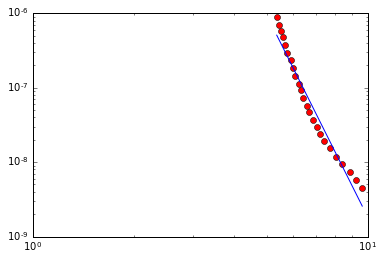

In [9]:
c.add_curve(5,10,1)

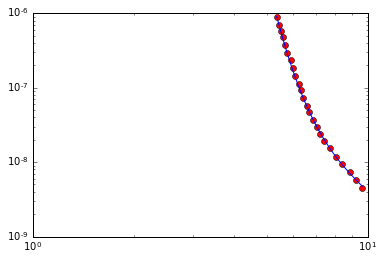

In [10]:
c.delete_last_curve()
c.add_curve(5,10,3)

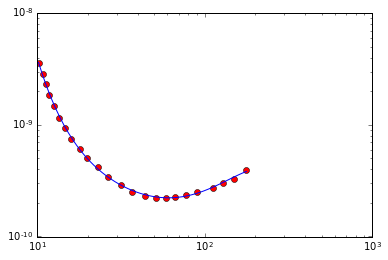

In [11]:
c.add_curve(10,2E2,5)

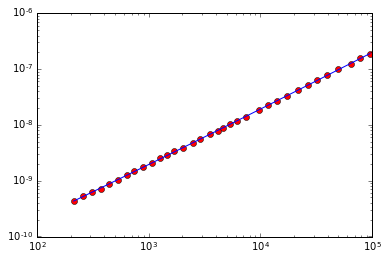

In [12]:
c.add_curve(2E2,1E5,2)

In [13]:
c.polys

,coeffs,xmax,xmin
0,"[-58.5793715856, 175.480474984, -179.648505904...",10,5
1,"[-2.18414448257, 18.8255480892, -64.7705060354...",200,10
2,"[0.0108097341737, 0.91688244262, -11.5567769094]",100000,200


The funcion can also be evaluated for just a point, with a warning if the value is out the range used in the fit. The warnings are disabled with the option `verbose=False` (check `c?`) 

In [14]:
c(1E6)

('WARNING: Out of fitted range:', 1000000.0)


2.1560964103695883e-06

In [15]:
xlog=np.logspace( np.log10( 5 ),np.log10( 1E5 ) )

('WARNING: Out of fitted range:', 100000.0)


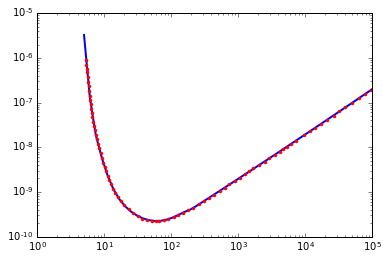

In [16]:
plt.loglog( xlog,c(xlog),lw=2)                 
plt.loglog(df[x],df[y],'r.')

## Save the picewise fit

In [17]:
c.to_json('lux2016.json')

## Recover fit from file

In [18]:
ff=multicurvefit()
ff.read_json('lux2016.json')

In [19]:
ff.polys

,coeffs,xmax,xmin
0,"[-58.5793715856, 175.480474983, -179.648505904...",10,5
1,"[-2.1841444826, 18.8255480892, -64.7705060354,...",200,10
2,"[0.0108097342, 0.9168824426, -11.5567769094]",100000,200


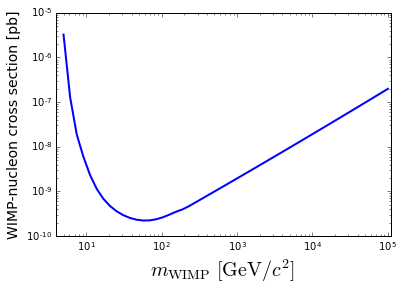

In [20]:
xx=np.logspace( np.log10(ff.polys.xmin.min()),np.log10(ff.polys.xmax.max()-0.1 ) )
plt.loglog(xx,ff(xx),'b-',lw=2)
plt.xlim(ff.polys.xmin.min()*0.8,ff.polys.xmax.max()*1.1)
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

In [22]:
pwd

u'/home/restrepo/prog/github/straightfits'

## Extraplolation
is now much better

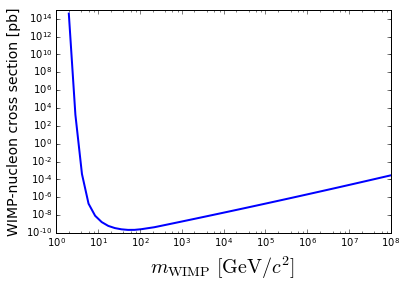

In [49]:
xx=np.logspace( np.log10(2),np.log10(1E8 ) )
plt.loglog(xx,ff(xx,verbose=False),'b-',lw=2)
#plt.xlim(ff.polys.xmin.min()*0.8,ff.polys.xmax.max()*1.1)
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

## See further examples:
[examples](./examples/example_multicurves.ipynb)